In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from myfunc.otsu import *
from myfunc.fuzzy_threshold import *

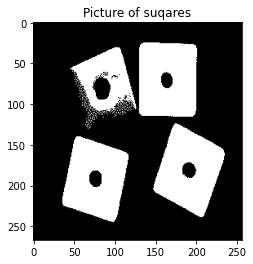

In [2]:
file_loc = "../../data/ass2/"
frame = np.loadtxt(file_loc+"squares.txt",delimiter=",").astype(np.uint8)
sigma_square= [otsu_criteria_compute(frame, th) for th in range(256)]
sigma_square = np.asarray(sigma_square)

otsu_t = otsu_threshold(frame)
otsu_res = np.zeros(frame.shape, dtype=np.uint8)

otsu_res[frame >= otsu_t] = 255

plt.imshow(otsu_res,cmap="gray")
plt.title("Picture of suqares")
plt.show()

## Otsu Opencv result

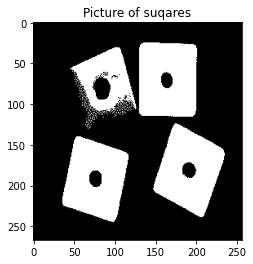

In [24]:
ret,th1 = cv2.threshold(frame,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th1,cmap="gray")
plt.title("Picture of suqares")
plt.show()

## Fuzzy method

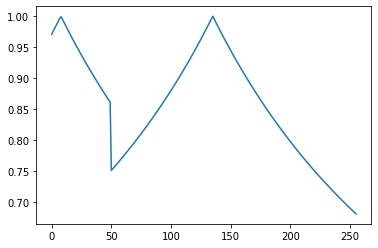

In [12]:
x = 50
C = 256
t_range = np.arange(0, 256)
class0 = frame[frame < t]

if (class0.size == 0):
    # deal with empty slice
    mean0 = 0
else:
    mean0 = np.mean(frame[frame < t])
class1 = frame[frame >= t]
if (class1.size == 0):
    # deal with empty slice
    mean1 = 0
else:
    mean1 = np.mean(frame[frame >= t])    

mu = []
for t in t_range:
    if x < t:
        mu.append(1/(1+np.abs(x-mean0)/C))
    else:
        mu.append(1/(1+np.abs(x-mean1)/C))
plt.plot(x_range,mu)


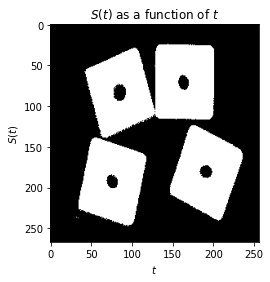

In [3]:
S_t, fuzzy_t = fuzzy_threshold(frame) 
fuzzy_res = np.zeros(frame.shape, dtype=np.uint8)
fuzzy_res[frame >= fuzzy_t] = 255

x = np.arange(0, 256) 
plt.title("$S(t)$ as a function of $t$ ") 
plt.xlabel("$t$") 
plt.ylabel("$S(t)$") 
plt.plot(x,S_t)
plt.imshow(fuzzy_res, cmap='gray')